<a href="https://colab.research.google.com/github/skumarudel/DSPS_SKumar/blob/master/HW3/Kolmogorov_smirnov_earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by Sajan Kumar
# Kolmogorov Smirnoff test, application to earthquake data

In [1]:
#all the imports I needed
from __future__ import print_function, division
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import numpy as np
%matplotlib inline
plt.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")
#plt.style.use('ggplot')

This homework asks you to reproduce the work in [Corral 2018](https://arxiv.org/pdf/0910.0055.pdf) which is well described, but not "reproducible". 
Corral 2018 uses a K-S test to show that at different magnitude scales the time gaps between earthquakes follows the same distribution. If true, this indicates that there is a consistent scaling law. 

The argument is a little convoluted, but it is a somewhat innovative use of the test. Corall compares the time gap between earthquakes  greater than a certain magnitude threshold with the time gaps between earthquakes above a different threshold, and finds no differences.

Remind yourself exactly what the K-S test is about :


1 What is the test's Null Hypothsis that the K-S test tests?


**Answer:** Under the Null Hypoethesis, the K-S tests determine if the two data sets comes from the same distribution.


2 What is the "statistic" or "pivotal quantity" that the test uses?

**Answer:** The pivotal quantity or statistics measure by K-S test is calculation of absolute value of the maximum difference between the cumulative distributions of two datasets

$D = max | CDF_{1}(x) - CDF_{2}(x)|$ 

3 What does the probability distribution of this statistic depend on? 

**Answer:** The probability distribution of the KS statistics depends only upon the number of datapoints N in each data sets which we are comparing.


see the example below, just for a proof

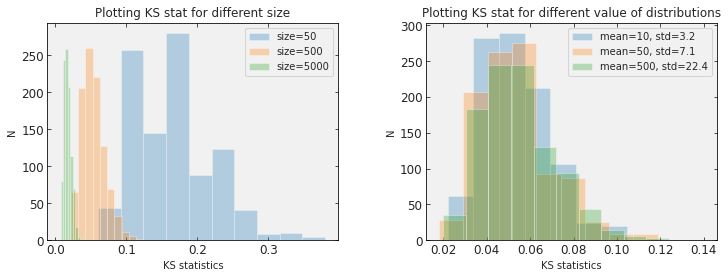

In [6]:
np.random.seed(56)
fig,axes = plt.subplots(1,2,figsize=(12,4))
mean = 10
loc = np.sqrt(mean)
for s in [50,500,5000]:
  distance = np.zeros(1000)
  for i in range(len(distance)):
      one = np.random.normal(mean,loc, size=s)
      two = np.random.normal(mean,loc, size=s)
      distance[i] = stats.ks_2samp(one,two)[0]
  axes[0].hist(distance, alpha=0.3, label="size={}".format(s)); 
axes[0].set_xlabel('KS statistics')
axes[0].set_ylabel('N')
axes[0].set_title('Plotting KS stat for different size')
axes[0].legend()


for mean in [10,50,500]:
  distance = np.zeros(1000)
  for i in range(len(distance)):
      one = np.random.normal(mean,np.sqrt(mean), size=500)
      two = np.random.normal(mean,np.sqrt(mean), size=500)
      distance[i] = stats.ks_2samp(one,two)[0]
  axes[1].hist(distance, alpha=0.3, label="mean={}, std={:.1f}".format(mean, np.sqrt(mean))); 
axes[1].set_xlabel('KS statistics')
axes[1].set_ylabel('N')
axes[1].set_title('Plotting KS stat for different value of distributions')
axes[1].legend();

plt.subplots_adjust(wspace=0.3)



You can see that when I change the size (Number of data points) of two distributions which I am using for comparison, the KS statisitcs looks differrent (left plot). However, when I keep the size same and change the distributions (changing means and standard deviation), the KS statistics distribution looks pretty much same (statistically) 